# Importing Necessary Libraries

In [272]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping


In [273]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [274]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [276]:
df["Exited"].unique()

array([1, 0])

In [277]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [278]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [279]:
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


<Axes: xlabel='Exited', ylabel='count'>

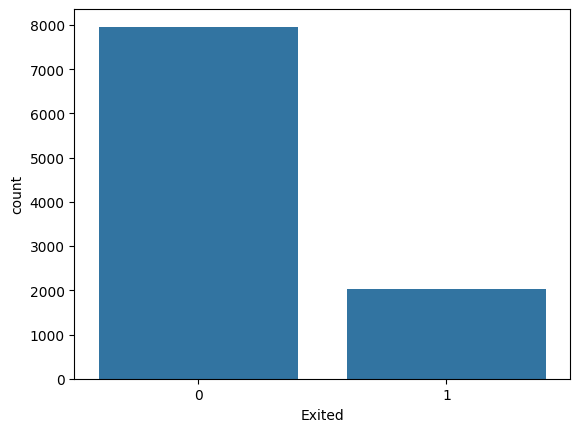

In [280]:
sns.countplot(data = df, x = df["Exited"])

#### We see this is highly imbalance data we need to balance exited values as it will be our target variable to train the model

In [281]:
data_majority = df[(df["Exited"] == 0)]
data_minority = df[(df["Exited"] == 1)]

minority_data_unsampled = resample(data_minority,
                                   replace=True,
                                   n_samples=7963,
                                   random_state= 42)

df = pd.concat([minority_data_unsampled,data_majority])

In [282]:
df["Exited"].value_counts()

,count
Exited,
1,7963
0,7963


<Axes: xlabel='Exited', ylabel='count'>

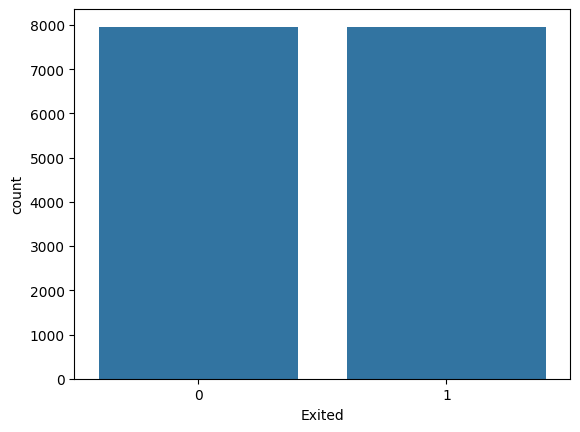

In [283]:
sns.countplot(data = df, x = df["Exited"])

In [284]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5363,5364,15663410,Piccio,771,Spain,Male,51,5,135506.58,3,1,1,152479.64,1
7088,7089,15600975,Chiemenam,556,France,Female,54,4,150005.38,1,1,0,157015.50,1
4076,4077,15676404,Kirillov,672,France,Female,50,1,0.00,1,1,0,12106.82,1
6255,6256,15589017,Chiu,547,Germany,Male,55,4,111362.76,3,1,0,16922.28,1
5371,5372,15580701,Ma,712,France,Male,33,3,153819.58,1,1,0,79176.09,1


### Removing unwanted columns

In [285]:
df = df.drop(["RowNumber","CustomerId","Surname"],axis = 1)

In [286]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5363,771,Spain,Male,51,5,135506.58,3,1,1,152479.64,1
7088,556,France,Female,54,4,150005.38,1,1,0,157015.50,1
4076,672,France,Female,50,1,0.00,1,1,0,12106.82,1
6255,547,Germany,Male,55,4,111362.76,3,1,0,16922.28,1
5371,712,France,Male,33,3,153819.58,1,1,0,79176.09,1


# Handling Categorical Variables

In [289]:

labelEncoder = LabelEncoder()

df["Gender"] = labelEncoder.fit_transform(df["Gender"])

In [290]:

df["Geography"] = labelEncoder.fit_transform(df["Geography"])

In [291]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5363,771,2,1,51,5,135506.58,3,1,1,152479.64,1
7088,556,0,0,54,4,150005.38,1,1,0,157015.50,1
4076,672,0,0,50,1,0.00,1,1,0,12106.82,1
6255,547,1,1,55,4,111362.76,3,1,0,16922.28,1
5371,712,0,1,33,3,153819.58,1,1,0,79176.09,1


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15926 entries, 5363 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      15926 non-null  int64  
 1   Geography        15926 non-null  int64  
 2   Gender           15926 non-null  int64  
 3   Age              15926 non-null  int64  
 4   Tenure           15926 non-null  int64  
 5   Balance          15926 non-null  float64
 6   NumOfProducts    15926 non-null  int64  
 7   HasCrCard        15926 non-null  int64  
 8   IsActiveMember   15926 non-null  int64  
 9   EstimatedSalary  15926 non-null  float64
 10  Exited           15926 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.5 MB


In [293]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [294]:
df["Balance"] = df["Balance"].astype('int')


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15926 entries, 5363 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      15926 non-null  int64  
 1   Geography        15926 non-null  int64  
 2   Gender           15926 non-null  int64  
 3   Age              15926 non-null  int64  
 4   Tenure           15926 non-null  int64  
 5   Balance          15926 non-null  int64  
 6   NumOfProducts    15926 non-null  int64  
 7   HasCrCard        15926 non-null  int64  
 8   IsActiveMember   15926 non-null  int64  
 9   EstimatedSalary  15926 non-null  float64
 10  Exited           15926 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.5 MB


<Axes: >

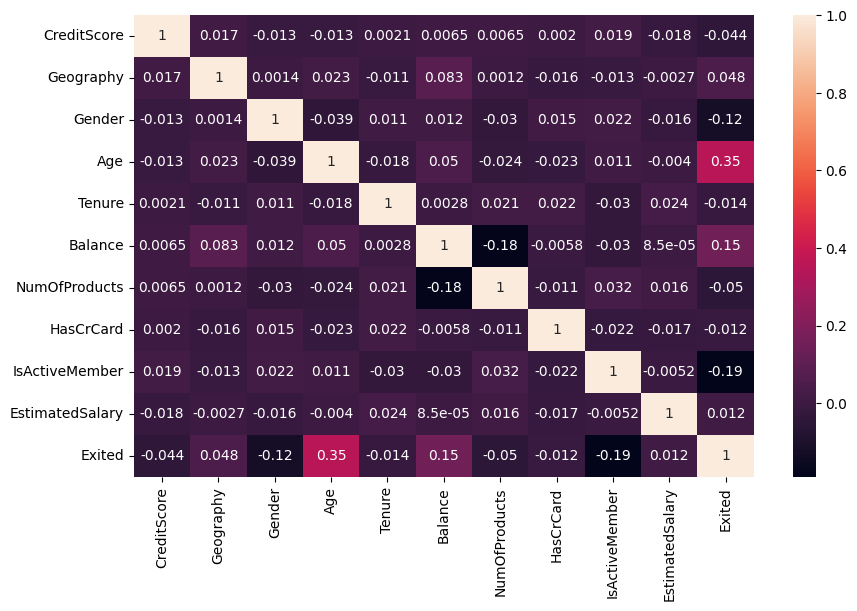

In [296]:

# check corr

plt.figure(figsize=(10,6))
sns.heatmap(data = df.corr(),annot=True)

# Define feature and Target variables

In [297]:
y = df["Exited"]
x = df.drop("Exited",axis = 1)

In [298]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5363,771,2,1,51,5,135506,3,1,1,152479.64
7088,556,0,0,54,4,150005,1,1,0,157015.50
4076,672,0,0,50,1,0,1,1,0,12106.82
6255,547,1,1,55,4,111362,3,1,0,16922.28
5371,712,0,1,33,3,153819,1,1,0,79176.09
...,...,...,...,...,...,...,...,...,...,...
9993,644,0,1,28,7,155060,1,1,0,29179.52
9994,800,0,0,29,2,0,2,0,0,167773.55
9995,771,0,1,39,5,0,2,1,0,96270.64
9996,516,0,1,35,10,57369,1,1,1,101699.77


# Feature Scaling

In [299]:
Minscaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [300]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42)

In [301]:
x_train.shape

(10670, 10)

# Building neural Network ANN model

In [302]:
model = Sequential()

# Input layer

model.add(Dense(128,activation="relu",input_dim=10))

# Hidden Layers
model.add(Dense(64,activation="relu"))
model.add(Dense(38,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer = "adam",loss="binary_crossentropy",metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [303]:
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0.0001,
                              patience=10,
                              verbose=1,
                              mode="auto",
                              baseline=None,
                              restore_best_weights=False,
                              start_from_epoch=0,)


In [304]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 38)                  │           2,470 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,535 (48.96 KB)

 Trainable params: 12,535 (48.96 KB)

 Non-trainable params: 0 (0.00 B)

In [305]:
model_history = model.fit(
    x_train,
    y_train,
    validation_split=0.33,
    batch_size=10,
    epochs = 1000,
    callbacks=[early_stopping]
)

Epoch 1/1000
715/715 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6197 - loss: 0.6414 - val_accuracy: 0.7084 - val_loss: 0.5614
Epoch 2/1000
715/715 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7349 - loss: 0.5200 - val_accuracy: 0.7345 - val_loss: 0.5182
Epoch 3/1000
715/715 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7653 - loss: 0.4855 - val_accuracy: 0.7217 - val_loss: 0.5311
Epoch 4/1000
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7716 - loss: 0.4706 - val_accuracy: 0.7572 - val_loss: 0.4888
Epoch 5/1000
715/715 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7792 - loss: 0.4632 - val_accuracy: 0.7624 - val_loss: 0.4904
Epoch 6/1000
715/715 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7808 - loss: 0.4557 - val_accuracy: 0.7618 - val_loss: 0.4878
Epoch 7/1000
715/715 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7850 - loss: 0.4512 - val_accuracy: 0.7663 - val_loss: 0.4778
Epoch 8/1000
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7976 - loss: 0.4375 -

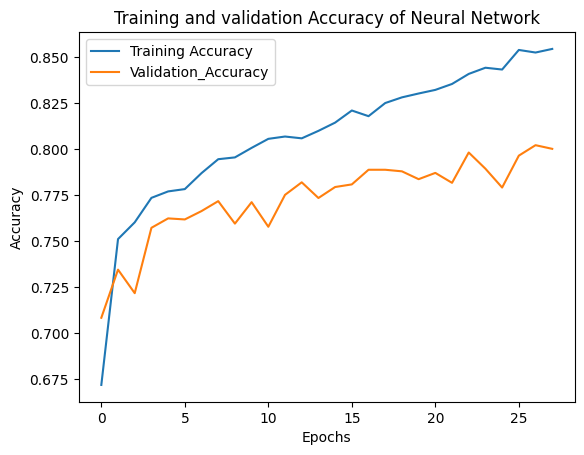

In [306]:
plt.plot(model_history.history["accuracy"],label="Training Accuracy")
plt.plot(model_history.history["val_accuracy"],label = "Validation_Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and validation Accuracy of Neural Network")

plt.legend()
plt.show()